In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 21.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

data = pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_final2_전체.feather의 사본')

df = pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_clean_N2.feather')

In [ ]:
df['loan_status_N'] = df['loan_status_N'].replace({1: 0, 0: 1})

In [ ]:
df['loan_status_N'].value_counts()

,count
loan_status_N,
0,1497783
1,381854


In [ ]:
from sklearn.model_selection import train_test_split

# 피쳐, 타겟 분리
df_X = df.drop(columns=['loan_status_N'])
df_y = df['loan_status_N']
features = df_X.columns

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=1234, stratify=df_y)

# ((1719681, 60), (1719681,), (1375744, 60), (343937, 60), (1375744,), (343937,))
df_X.shape, df_y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((422347, 43), (422347,), (337877, 43), (84470, 43), (337877,), (84470,))

# undersampling 안한 것

Train Accuracy: 79.45%
Train f1_score: 34.10%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.97      0.88    258804
     Class 1       0.68      0.23      0.34     79073

    accuracy                           0.79    337877
   macro avg       0.74      0.60      0.61    337877
weighted avg       0.78      0.79      0.75    337877

Test Accuracy: 77.58%
Test f1_score: 27.44%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.96      0.87     64702
     Class 1       0.57      0.18      0.27     19768

    accuracy                           0.78     84470
   macro avg       0.68      0.57      0.57     84470
weighted avg       0.74      0.78      0.73     84470

Train ROC AUC: 0.79
Test ROC AUC: 0.73


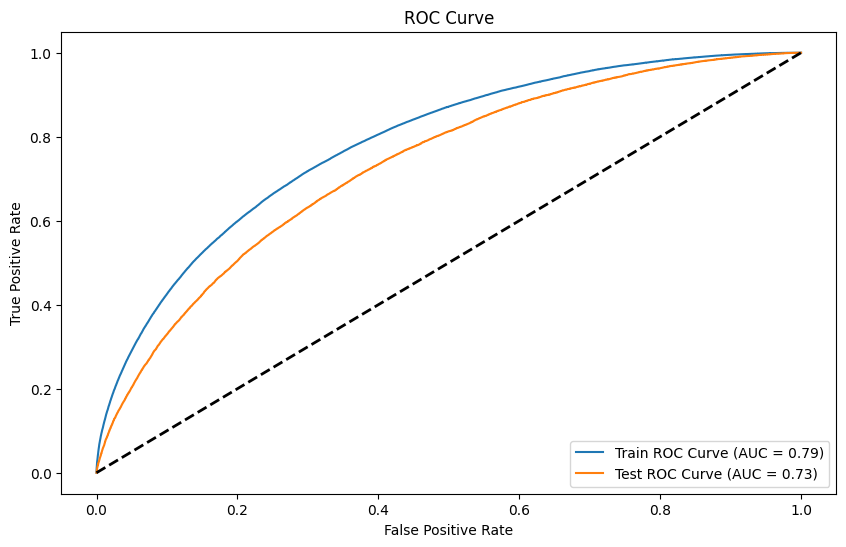

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# xgb 모델 학습
xgb_model = XGBClassifier(n_jobs=-1, random_state=1234)
xgb_model.fit(X_train, y_train)

# 학습 데이터에 대한 예측
xgb_train_pred = xgb_model.predict(X_train)

# 테스트 데이터에 대한 예측
xgb_test_pred = xgb_model.predict(X_test)

# 학습 데이터 성능 평가
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred)
xgb_train_report = classification_report(y_train, xgb_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {xgb_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {xgb_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(xgb_train_report)

# 테스트 데이터 성능 평가
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred)
xgb_test_report = classification_report(y_test, xgb_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {xgb_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {xgb_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(xgb_test_report)

# ROC AUC 계산
xgb_train_auc = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])
xgb_test_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Train ROC AUC: {xgb_train_auc:.2f}")
print(f"Test ROC AUC: {xgb_test_auc:.2f}")

# ROC Curve 시각화
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {xgb_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {xgb_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defin

최적의 임계값: 0.22
최적 임계값에서의 F1-score: 0.48
최적 임계값에서의 Precision: 0.37
최적 임계값에서의 Recall: 0.71


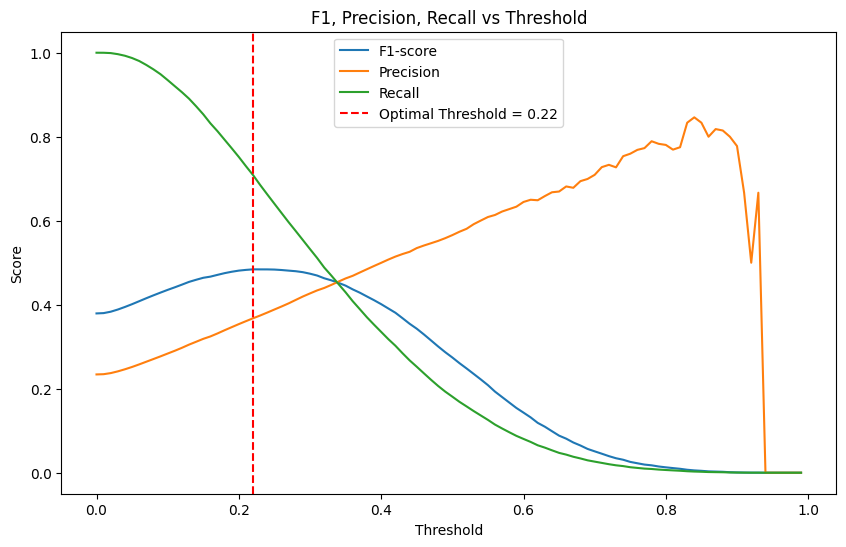

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# 예측 확률 계산
xgb_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# 임계값 범위 설정
thresholds = np.arange(0.0, 1.0, 0.01)

# 각 임계값에서의 F1, Precision, Recall 저장을 위한 리스트 초기화
f1_scores = []
precisions = []
recalls = []

# 각 임계값에서 성능 지표 계산
for threshold in thresholds:
    # 임계값에 따른 예측 결과 계산
    xgb_test_pred_threshold = (xgb_test_proba >= threshold).astype(int)

    # F1, Precision, Recall 계산
    f1 = f1_score(y_test, xgb_test_pred_threshold)
    precision = precision_score(y_test, xgb_test_pred_threshold)
    recall = recall_score(y_test, xgb_test_pred_threshold)

    # 결과 저장
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# F1-score가 최대인 임계값 찾기
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"최적의 임계값: {optimal_threshold:.2f}")
print(f"최적 임계값에서의 F1-score: {f1_scores[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Precision: {precisions[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Recall: {recalls[optimal_idx]:.2f}")

# F1, Precision, Recall을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1, Precision, Recall vs Threshold')
plt.legend(loc='best')
plt.show()


Train Accuracy: 79.88%
Train f1_score: 34.91%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      0.97      0.88    258804
     Class 1       0.72      0.23      0.35     79073

    accuracy                           0.80    337877
   macro avg       0.76      0.60      0.62    337877
weighted avg       0.79      0.80      0.76    337877

Test Accuracy: 77.81%
Test f1_score: 27.51%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.96      0.87     64702
     Class 1       0.58      0.18      0.28     19768

    accuracy                           0.78     84470
   macro avg       0.69      0.57      0.57     84470
weighted avg       0.74      0.78      0.73     84470

Train ROC AUC: 0.79
Test ROC AUC: 0.74


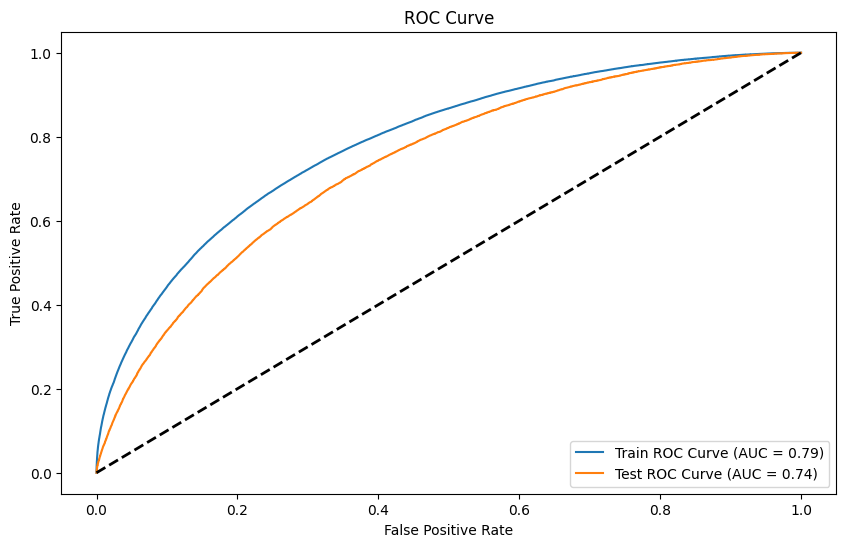

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# CatBoost 모델 학습
cat_model = CatBoostClassifier(random_state=1234, verbose=0)  # verbose=0은 학습 중 출력을 생략합니다
cat_model.fit(X_train, y_train)

# 학습 데이터에 대한 예측
cat_train_pred = cat_model.predict(X_train)

# 테스트 데이터에 대한 예측
cat_test_pred = cat_model.predict(X_test)

# 학습 데이터 성능 평가
cat_train_accuracy = accuracy_score(y_train, cat_train_pred)
cat_train_f1 = f1_score(y_train, cat_train_pred)
cat_train_report = classification_report(y_train, cat_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {cat_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {cat_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(cat_train_report)

# 테스트 데이터 성능 평가
cat_test_accuracy = accuracy_score(y_test, cat_test_pred)
cat_test_f1 = f1_score(y_test, cat_test_pred)
cat_test_report = classification_report(y_test, cat_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {cat_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {cat_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(cat_test_report)

# ROC AUC 계산
cat_train_auc = roc_auc_score(y_train, cat_model.predict_proba(X_train)[:, 1])
cat_test_auc = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

print(f"Train ROC AUC: {cat_train_auc:.2f}")
print(f"Test ROC AUC: {cat_test_auc:.2f}")

# ROC Curve 시각화
fpr_train, tpr_train, _ = roc_curve(y_train, cat_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, cat_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {cat_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {cat_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


최적의 임계값: 0.24
최적 임계값에서의 F1-score: 0.49
최적 임계값에서의 Precision: 0.39
최적 임계값에서의 Recall: 0.67


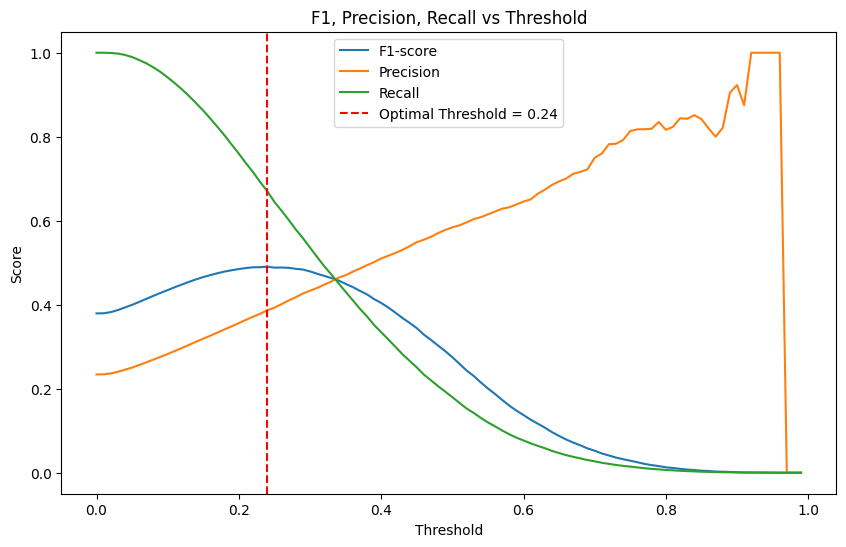

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 예측 확률 계산
cat_test_proba = cat_model.predict_proba(X_test)[:, 1]

# 임계값 범위 설정
thresholds = np.arange(0.0, 1.0, 0.01)

# 각 임계값에서의 F1, Precision, Recall 저장을 위한 리스트 초기화
f1_scores = []
precisions = []
recalls = []

# 각 임계값에서 성능 지표 계산
for threshold in thresholds:
    # 임계값에 따른 예측 결과 계산
    cat_test_pred_threshold = (cat_test_proba >= threshold).astype(int)

    # F1, Precision, Recall 계산
    f1 = f1_score(y_test, cat_test_pred_threshold)
    precision = precision_score(y_test, cat_test_pred_threshold)
    recall = recall_score(y_test, cat_test_pred_threshold)

    # 결과 저장
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# F1-score가 최대인 임계값 찾기
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"최적의 임계값: {optimal_threshold:.2f}")
print(f"최적 임계값에서의 F1-score: {f1_scores[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Precision: {precisions[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Recall: {recalls[optimal_idx]:.2f}")

# F1, Precision, Recall을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1, Precision, Recall vs Threshold')
plt.legend(loc='best')
plt.show()


# ENN 한것

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

Train_enn Accuracy: 78.93%
Train_enn f1_score: 68.25%
Train_enn Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.89      0.84    137775
     Class 1       0.76      0.62      0.68     79073

    accuracy                           0.79    216848
   macro avg       0.78      0.75      0.76    216848
weighted avg       0.79      0.79      0.78    216848

Train Accuracy: 72.94%
Train f1_score: 51.79%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.76      0.81    258804
     Class 1       0.44      0.62      0.52     79073

    accuracy                           0.73    337877
   macro avg       0.66      0.69      0.66    337877
weighted avg       0.77      0.73      0.74    337877

Test Accuracy: 70.89%
Test f1_score: 47.95%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.75      0.80     64702
   

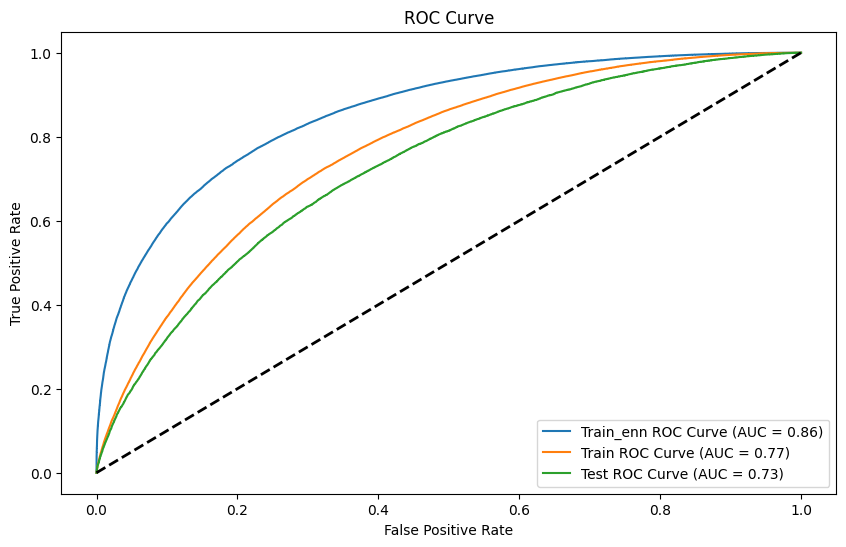

In [ ]:
## ENN만 한거

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_jobs=-1, random_state=1234)
xgb_model.fit(X_train_enn, y_train_enn)

# 언더샘플링 학습 데이터에 대한 예측
xgb_train_enn_pred = xgb_model.predict(X_train_enn)

# 학습 데이터에 대한 예측
xgb_train_pred = xgb_model.predict(X_train)

# 테스트 데이터에 대한 예측
xgb_test_pred = xgb_model.predict(X_test)

# 언더샘플링 학습 데이터 성능 평가
xgb_train_enn_accuracy = accuracy_score(y_train_enn, xgb_train_enn_pred)
xgb_train_enn_f1 = f1_score(y_train_enn, xgb_train_enn_pred)
xgb_train_enn_report = classification_report(y_train_enn, xgb_train_enn_pred, target_names=['Class 0', 'Class 1'])

print(f"Train_enn Accuracy: {xgb_train_enn_accuracy * 100:.2f}%")
print(f"Train_enn f1_score: {xgb_train_enn_f1 * 100:.2f}%")
print("Train_enn Classification Report:")
print(xgb_train_enn_report)

# 원본 학습 데이터 성능 평가
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred)
xgb_train_report = classification_report(y_train, xgb_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {xgb_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {xgb_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(xgb_train_report)

# 테스트 데이터 성능 평가
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred)
xgb_test_report = classification_report(y_test, xgb_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {xgb_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {xgb_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(xgb_test_report)

# ROC AUC 계산
xgb_train_enn_auc = roc_auc_score(y_train_enn, xgb_model.predict_proba(X_train_enn)[:, 1])
xgb_train_auc = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])
xgb_test_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Train_enn ROC AUC: {xgb_train_enn_auc:.2f}")
print(f"Train ROC AUC: {xgb_train_auc:.2f}")
print(f"Test ROC AUC: {xgb_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_enn, tpr_train_enn, _ = roc_curve(y_train_enn, xgb_model.predict_proba(X_train_enn)[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_enn, tpr_train_enn, label=f'Train_enn ROC Curve (AUC = {xgb_train_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {xgb_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {xgb_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


최적의 임계값: 0.41
최적 임계값에서의 F1-score: 0.49
최적 임계값에서의 Precision: 0.38
최적 임계값에서의 Recall: 0.67


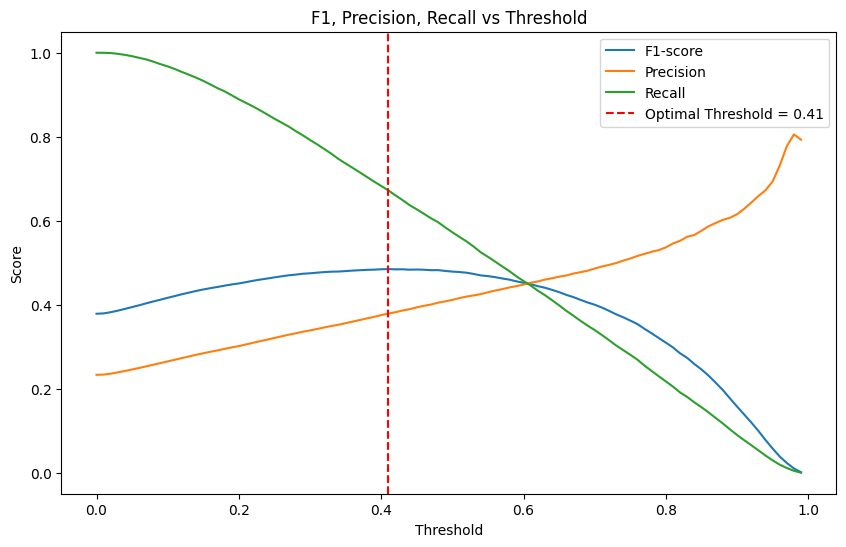

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# 예측 확률 계산
xgb_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# 임계값 범위 설정
thresholds = np.arange(0.0, 1.0, 0.01)

# 각 임계값에서의 F1, Precision, Recall 저장을 위한 리스트 초기화
f1_scores = []
precisions = []
recalls = []

# 각 임계값에서 성능 지표 계산
for threshold in thresholds:
    # 임계값에 따른 예측 결과 계산
    xgb_test_pred_threshold = (xgb_test_proba >= threshold).astype(int)

    # F1, Precision, Recall 계산
    f1 = f1_score(y_test, xgb_test_pred_threshold)
    precision = precision_score(y_test, xgb_test_pred_threshold)
    recall = recall_score(y_test, xgb_test_pred_threshold)

    # 결과 저장
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# F1-score가 최대인 임계값 찾기
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"최적의 임계값: {optimal_threshold:.2f}")
print(f"최적 임계값에서의 F1-score: {f1_scores[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Precision: {precisions[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Recall: {recalls[optimal_idx]:.2f}")

# F1, Precision, Recall을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1, Precision, Recall vs Threshold')
plt.legend(loc='best')
plt.show()


Train_enn Accuracy: 78.97%
Train_enn f1_score: 68.13%
Train_enn Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.89      0.84    137775
     Class 1       0.76      0.62      0.68     79073

    accuracy                           0.79    216848
   macro avg       0.78      0.75      0.76    216848
weighted avg       0.79      0.79      0.78    216848

Train Accuracy: 73.14%
Train f1_score: 51.78%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.77      0.81    258804
     Class 1       0.45      0.62      0.52     79073

    accuracy                           0.73    337877
   macro avg       0.66      0.69      0.67    337877
weighted avg       0.77      0.73      0.74    337877

Test Accuracy: 71.22%
Test f1_score: 48.09%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.76      0.80     64702
   

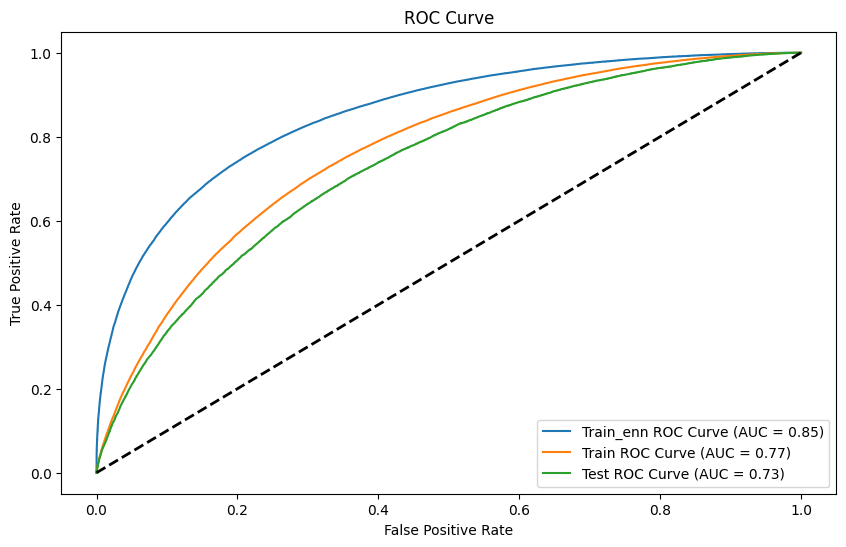

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# CatBoost 모델 학습
catboost_model = CatBoostClassifier(thread_count=-1, random_seed=1234, verbose=0)
catboost_model.fit(X_train_enn, y_train_enn)

# 언더샘플링 학습 데이터에 대한 예측
catboost_train_enn_pred = catboost_model.predict(X_train_enn)

# 학습 데이터에 대한 예측
catboost_train_pred = catboost_model.predict(X_train)

# 테스트 데이터에 대한 예측
catboost_test_pred = catboost_model.predict(X_test)

# 언더샘플링 학습 데이터 성능 평가
catboost_train_enn_accuracy = accuracy_score(y_train_enn, catboost_train_enn_pred)
catboost_train_enn_f1 = f1_score(y_train_enn, catboost_train_enn_pred)
catboost_train_enn_report = classification_report(y_train_enn, catboost_train_enn_pred, target_names=['Class 0', 'Class 1'])

print(f"Train_enn Accuracy: {catboost_train_enn_accuracy * 100:.2f}%")
print(f"Train_enn f1_score: {catboost_train_enn_f1 * 100:.2f}%")
print("Train_enn Classification Report:")
print(catboost_train_enn_report)

# 학습 데이터 성능 평가
catboost_train_accuracy = accuracy_score(y_train, catboost_train_pred)
catboost_train_f1 = f1_score(y_train, catboost_train_pred)
catboost_train_report = classification_report(y_train, catboost_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {catboost_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {catboost_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(catboost_train_report)

# 테스트 데이터 성능 평가
catboost_test_accuracy = accuracy_score(y_test, catboost_test_pred)
catboost_test_f1 = f1_score(y_test, catboost_test_pred)
catboost_test_report = classification_report(y_test, catboost_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {catboost_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {catboost_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(catboost_test_report)

# ROC AUC 계산
catboost_train_enn_auc = roc_auc_score(y_train_enn, catboost_model.predict_proba(X_train_enn)[:, 1])
catboost_train_auc = roc_auc_score(y_train, catboost_model.predict_proba(X_train)[:, 1])
catboost_test_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])

print(f"Train_enn ROC AUC: {catboost_train_enn_auc:.2f}")
print(f"Train ROC AUC: {catboost_train_auc:.2f}")
print(f"Test ROC AUC: {catboost_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_enn, tpr_train_enn, _ = roc_curve(y_train_enn, catboost_model.predict_proba(X_train_enn)[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, catboost_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, catboost_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_enn, tpr_train_enn, label=f'Train_enn ROC Curve (AUC = {catboost_train_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {catboost_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {catboost_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


최적의 임계값: 0.24
최적 임계값에서의 F1-score: 0.49
최적 임계값에서의 Precision: 0.39
최적 임계값에서의 Recall: 0.67


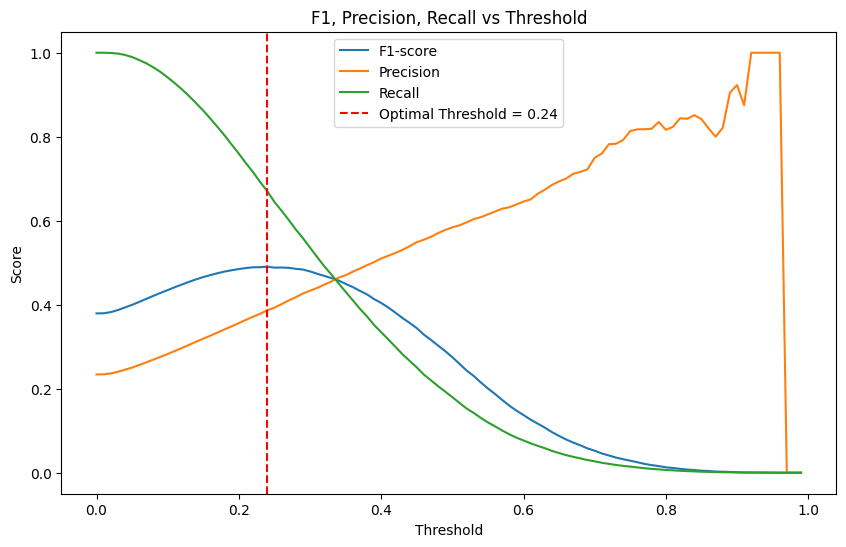

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 예측 확률 계산
cat_test_proba = cat_model.predict_proba(X_test)[:, 1]

# 임계값 범위 설정
thresholds = np.arange(0.0, 1.0, 0.01)

# 각 임계값에서의 F1, Precision, Recall 저장을 위한 리스트 초기화
f1_scores = []
precisions = []
recalls = []

# 각 임계값에서 성능 지표 계산
for threshold in thresholds:
    # 임계값에 따른 예측 결과 계산
    cat_test_pred_threshold = (cat_test_proba >= threshold).astype(int)

    # F1, Precision, Recall 계산
    f1 = f1_score(y_test, cat_test_pred_threshold)
    precision = precision_score(y_test, cat_test_pred_threshold)
    recall = recall_score(y_test, cat_test_pred_threshold)

    # 결과 저장
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# F1-score가 최대인 임계값 찾기
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"최적의 임계값: {optimal_threshold:.2f}")
print(f"최적 임계값에서의 F1-score: {f1_scores[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Precision: {precisions[optimal_idx]:.2f}")
print(f"최적 임계값에서의 Recall: {recalls[optimal_idx]:.2f}")

# F1, Precision, Recall을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1, Precision, Recall vs Threshold')
plt.legend(loc='best')
plt.show()


# SMOTE ENN 한 것

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

smote = SMOTE(random_state=42, n_jobs=-1)
enn = EditedNearestNeighbours(n_jobs=-1)
smote_enn = SMOTEENN(smote=smote, enn=enn, n_jobs=-1)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train_smote_enn Accuracy: 89.07%
Train_smote_enn f1_score: 86.84%
Train_smote_enn Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.98      0.91    258804
     Class 1       0.97      0.78      0.87    219902

    accuracy                           0.89    478706
   macro avg       0.91      0.88      0.89    478706
weighted avg       0.90      0.89      0.89    478706

Train Accuracy: 78.21%
Train f1_score: 22.14%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.98      0.87    258804
     Class 1       0.68      0.13      0.22     79073

    accuracy                           0.78    337877
   macro avg       0.73      0.56      0.55    337877
weighted avg       0.76      0.78      0.72    337877

Test Accuracy: 77.42%
Test f1_score: 18.76%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.98      

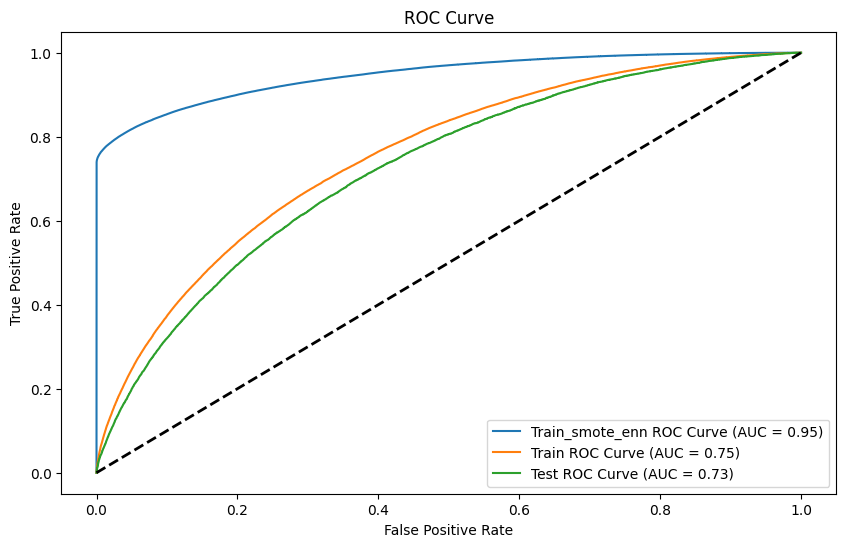

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_jobs=-1, random_state=1234)
xgb_model.fit(X_train_smote_enn, y_train_smote_enn)

# 언더샘플링 학습 데이터에 대한 예측
xgb_train_smote_enn_pred = xgb_model.predict(X_train_smote_enn)

# 원본 학습 데이터에 대한 예측
xgb_train_pred = xgb_model.predict(X_train)

# 테스트 데이터에 대한 예측
xgb_test_pred = xgb_model.predict(X_test)

# 언더샘플링 학습 데이터 성능 평가
xgb_train_smote_enn_accuracy = accuracy_score(y_train_smote_enn, xgb_train_smote_enn_pred)
xgb_train_smote_enn_f1 = f1_score(y_train_smote_enn, xgb_train_smote_enn_pred, average='binary')
xgb_train_smote_enn_report = classification_report(y_train_smote_enn, xgb_train_smote_enn_pred, target_names=['Class 0', 'Class 1'])

print(f"Train_smote_enn Accuracy: {xgb_train_smote_enn_accuracy * 100:.2f}%")
print(f"Train_smote_enn f1_score: {xgb_train_smote_enn_f1 * 100:.2f}%")
print("Train_smote_enn Classification Report:")
print(xgb_train_smote_enn_report)

# 원본 학습 데이터 성능 평가
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred, average='binary')
xgb_train_report = classification_report(y_train, xgb_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {xgb_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {xgb_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(xgb_train_report)

# 테스트 데이터 성능 평가
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred, average='binary')
xgb_test_report = classification_report(y_test, xgb_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {xgb_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {xgb_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(xgb_test_report)

# ROC AUC 계산
xgb_train_smote_enn_auc = roc_auc_score(y_train_smote_enn, xgb_model.predict_proba(X_train_smote_enn)[:, 1])
xgb_train_auc = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])
xgb_test_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Train_smote_enn ROC AUC: {xgb_train_smote_enn_auc:.2f}")
print(f"Train ROC AUC: {xgb_train_auc:.2f}")
print(f"Test ROC AUC: {xgb_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_smote_enn, tpr_train_smote_enn, _ = roc_curve(y_train_smote_enn, xgb_model.predict_proba(X_train_smote_enn)[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_smote_enn, tpr_train_smote_enn, label=f'Train_smote_enn ROC Curve (AUC = {xgb_train_smote_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {xgb_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {xgb_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Train_smote_enn Accuracy: 68.14%
Train_smote_enn f1_score: 73.84%
Train_smote_enn Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.43      0.59    258804
     Class 1       0.59      0.98      0.74    219902

    accuracy                           0.68    478706
   macro avg       0.78      0.70      0.67    478706
weighted avg       0.79      0.68      0.66    478706

Train Accuracy: 53.42%
Train f1_score: 46.91%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.43      0.59    258804
     Class 1       0.32      0.88      0.47     79073

    accuracy                           0.53    337877
   macro avg       0.62      0.65      0.53    337877
weighted avg       0.78      0.53      0.56    337877

Test Accuracy: 52.47%
Test f1_score: 45.76%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.42      

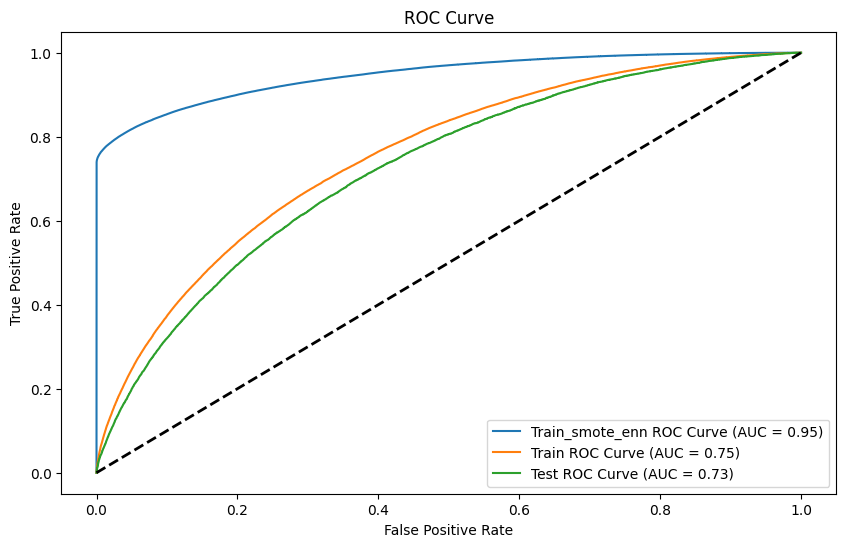

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_jobs=-1, random_state=1234)
xgb_model.fit(X_train_smote_enn, y_train_smote_enn)

# 임계값 설정
threshold = 0.1  # 기본값은 0.5, 이를 필요에 따라 조정 가능

# 언더샘플링 학습 데이터에 대한 예측 (임계값 적용)
xgb_train_smote_enn_pred_proba = xgb_model.predict_proba(X_train_smote_enn)[:, 1]
xgb_train_smote_enn_pred = (xgb_train_smote_enn_pred_proba >= threshold).astype(int)

# 원본 학습 데이터에 대한 예측 (임계값 적용)
xgb_train_pred_proba = xgb_model.predict_proba(X_train)[:, 1]
xgb_train_pred = (xgb_train_pred_proba >= threshold).astype(int)

# 테스트 데이터에 대한 예측 (임계값 적용)
xgb_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_test_pred = (xgb_test_pred_proba >= threshold).astype(int)

# 언더샘플링 학습 데이터 성능 평가
xgb_train_smote_enn_accuracy = accuracy_score(y_train_smote_enn, xgb_train_smote_enn_pred)
xgb_train_smote_enn_f1 = f1_score(y_train_smote_enn, xgb_train_smote_enn_pred, average='binary')
xgb_train_smote_enn_report = classification_report(y_train_smote_enn, xgb_train_smote_enn_pred, target_names=['Class 0', 'Class 1'])

print(f"Train_smote_enn Accuracy: {xgb_train_smote_enn_accuracy * 100:.2f}%")
print(f"Train_smote_enn f1_score: {xgb_train_smote_enn_f1 * 100:.2f}%")
print("Train_smote_enn Classification Report:")
print(xgb_train_smote_enn_report)

# 원본 학습 데이터 성능 평가
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred, average='binary')
xgb_train_report = classification_report(y_train, xgb_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {xgb_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {xgb_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(xgb_train_report)

# 테스트 데이터 성능 평가
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred, average='binary')
xgb_test_report = classification_report(y_test, xgb_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {xgb_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {xgb_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(xgb_test_report)

# ROC AUC 계산
xgb_train_smote_enn_auc = roc_auc_score(y_train_smote_enn, xgb_train_smote_enn_pred_proba)
xgb_train_auc = roc_auc_score(y_train, xgb_train_pred_proba)
xgb_test_auc = roc_auc_score(y_test, xgb_test_pred_proba)

print(f"Train_smote_enn ROC AUC: {xgb_train_smote_enn_auc:.2f}")
print(f"Train ROC AUC: {xgb_train_auc:.2f}")
print(f"Test ROC AUC: {xgb_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_smote_enn, tpr_train_smote_enn, _ = roc_curve(y_train_smote_enn, xgb_train_smote_enn_pred_proba)
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, xgb_test_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_smote_enn, tpr_train_smote_enn, label=f'Train_smote_enn ROC Curve (AUC = {xgb_train_smote_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {xgb_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {xgb_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Train_smote_enn Accuracy: 89.94%
Train_smote_enn f1_score: 87.55%
Train_smote_enn Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.99      0.92    258804
     Class 1       0.99      0.79      0.88    211606

    accuracy                           0.90    470410
   macro avg       0.92      0.89      0.90    470410
weighted avg       0.91      0.90      0.90    470410

Train Accuracy: 78.73%
Train f1_score: 20.61%
Train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.99      0.88    258804
     Class 1       0.81      0.12      0.21     79073

    accuracy                           0.79    337877
   macro avg       0.80      0.55      0.54    337877
weighted avg       0.79      0.79      0.72    337877

Test Accuracy: 77.22%
Test f1_score: 13.95%
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.98      

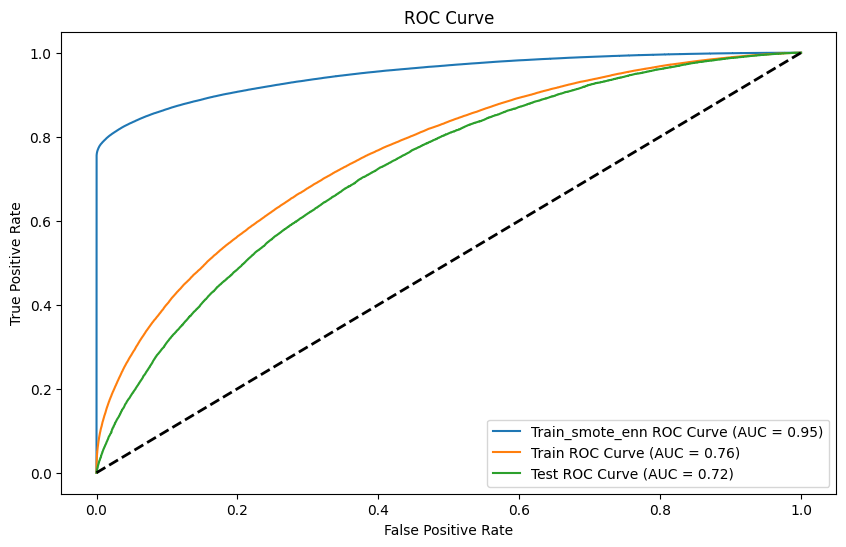

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# CatBoost 모델 학습
cat_model = CatBoostClassifier(thread_count=-1, random_seed=1234, verbose=0)  # verbose=0을 설정하여 학습 중 출력을 생략
cat_model.fit(X_train_smote_enn, y_train_smote_enn)

# 언더샘플링 학습 데이터에 대한 예측
cat_train_smote_enn_pred = cat_model.predict(X_train_smote_enn)

# 원본 학습 데이터에 대한 예측
cat_train_pred = cat_model.predict(X_train)

# 테스트 데이터에 대한 예측
cat_test_pred = cat_model.predict(X_test)

# 언더샘플링 학습 데이터 성능 평가
cat_train_smote_enn_accuracy = accuracy_score(y_train_smote_enn, cat_train_smote_enn_pred)
cat_train_smote_enn_f1 = f1_score(y_train_smote_enn, cat_train_smote_enn_pred, average='binary')
cat_train_smote_enn_report = classification_report(y_train_smote_enn, cat_train_smote_enn_pred, target_names=['Class 0', 'Class 1'])

print(f"Train_smote_enn Accuracy: {cat_train_smote_enn_accuracy * 100:.2f}%")
print(f"Train_smote_enn f1_score: {cat_train_smote_enn_f1 * 100:.2f}%")
print("Train_smote_enn Classification Report:")
print(cat_train_smote_enn_report)

# 원본 학습 데이터 성능 평가
cat_train_accuracy = accuracy_score(y_train, cat_train_pred)
cat_train_f1 = f1_score(y_train, cat_train_pred, average='binary')
cat_train_report = classification_report(y_train, cat_train_pred, target_names=['Class 0', 'Class 1'])

print(f"Train Accuracy: {cat_train_accuracy * 100:.2f}%")
print(f"Train f1_score: {cat_train_f1 * 100:.2f}%")
print("Train Classification Report:")
print(cat_train_report)

# 테스트 데이터 성능 평가
cat_test_accuracy = accuracy_score(y_test, cat_test_pred)
cat_test_f1 = f1_score(y_test, cat_test_pred, average='binary')
cat_test_report = classification_report(y_test, cat_test_pred, target_names=['Class 0', 'Class 1'])

print(f"Test Accuracy: {cat_test_accuracy * 100:.2f}%")
print(f"Test f1_score: {cat_test_f1 * 100:.2f}%")
print("Test Classification Report:")
print(cat_test_report)

# ROC AUC 계산
cat_train_smote_enn_auc = roc_auc_score(y_train_smote_enn, cat_model.predict_proba(X_train_smote_enn)[:, 1])
cat_train_auc = roc_auc_score(y_train, cat_model.predict_proba(X_train)[:, 1])
cat_test_auc = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

print(f"Train_smote_enn ROC AUC: {cat_train_smote_enn_auc:.2f}")
print(f"Train ROC AUC: {cat_train_auc:.2f}")
print(f"Test ROC AUC: {cat_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_smote_enn, tpr_train_smote_enn, _ = roc_curve(y_train_smote_enn, cat_model.predict_proba(X_train_smote_enn)[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, cat_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, cat_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_smote_enn, tpr_train_smote_enn, label=f'Train_smote_enn ROC Curve (AUC = {cat_train_smote_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {cat_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {cat_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, classification_report, precision_recall_curve

# 모델의 예측 확률 계산
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Youden's J statistic 계산 (TPR - FPR)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold (Youden\'s J statistic): {optimal_threshold:.2f}')

# Precision-Recall Curve 계산
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

# F1 Score 계산
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx_f1 = np.argmax(f1_scores)
optimal_threshold_f1 = pr_thresholds[optimal_idx_f1]

print(f'Optimal Threshold (F1 Score): {optimal_threshold_f1:.2f}')

# 최적 임계값 적용 후 성능 평가
y_test_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
y_test_pred_optimal_f1 = (y_pred_proba >= optimal_threshold_f1).astype(int)

print("\nPerformance using Optimal Threshold (Youden's J statistic):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_optimal) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_test_pred_optimal) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_optimal))

print("\nPerformance using Optimal Threshold (F1 Score):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_optimal_f1) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_test_pred_optimal_f1) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_optimal_f1))


Optimal Threshold (Youden's J statistic): 0.17
Optimal Threshold (F1 Score): 0.17

Performance using Optimal Threshold (Youden's J statistic):
Accuracy: 64.74%
F1 Score: 48.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.63      0.73     64702
         1.0       0.37      0.70      0.48     19768

    accuracy                           0.65     84470
   macro avg       0.62      0.66      0.61     84470
weighted avg       0.75      0.65      0.67     84470


Performance using Optimal Threshold (F1 Score):
Accuracy: 65.06%
F1 Score: 48.01%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74     64702
         1.0       0.37      0.69      0.48     19768

    accuracy                           0.65     84470
   macro avg       0.62      0.66      0.61     84470
weighted avg       0.75      0.65      0.68     84470



# voting 한 것

Ensemble Model train_enn Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.88      0.84    133432
     Class 1       0.76      0.63      0.69     79073

    accuracy                           0.79    212505
   macro avg       0.78      0.75      0.76    212505
weighted avg       0.78      0.79      0.78    212505

Ensemble Model train Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.77      0.82    258804
     Class 1       0.46      0.63      0.53     79073

    accuracy                           0.74    337877
   macro avg       0.66      0.70      0.67    337877
weighted avg       0.77      0.74      0.75    337877

Ensemble Model Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.75      0.80     64702
     Class 1       0.41      0.56      0.47     19768

    accuracy                           0.71    

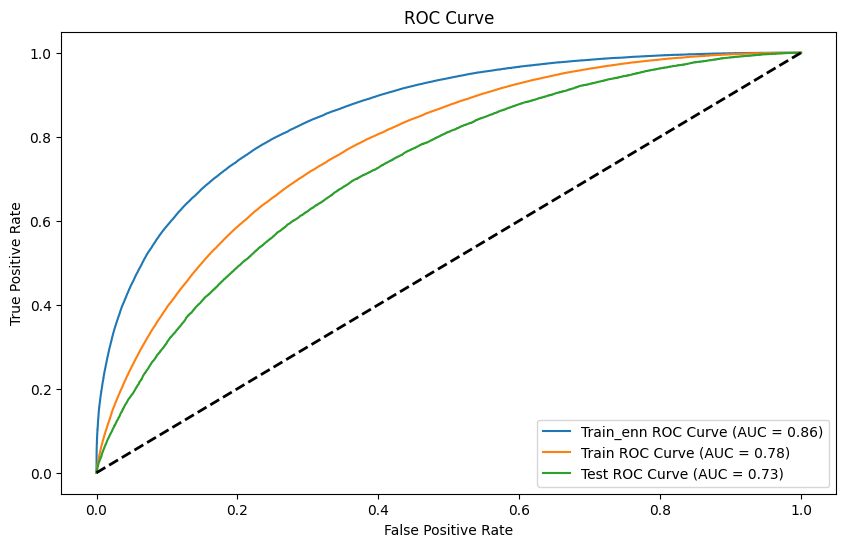

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 개별 모델 정의
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=1234,
    n_jobs=-1
)
xgb_model = XGBClassifier(n_jobs=-1, random_state=1234)
cat_model = CatBoostClassifier(thread_count=-1, random_state=1234, verbose=0)

# VotingClassifier를 사용한 앙상블
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('cat', cat_model)],
    voting='soft'  # soft voting을 통해 각 모델의 확률 값을 평균내어 결정
)

# 모델 학습
ensemble_model.fit(X_train_enn, y_train_enn)

# 테스트 데이터에 대한 예측
ensemble_test_pred = ensemble_model.predict(X_test)

# 원본 학습 데이터에 대한 예측
ensemble_train_pred = ensemble_model.predict(X_train)

# ENN 학습 데이터에 대한 예측
ensemble_train_enn_pred = ensemble_model.predict(X_train_enn)

# 성능 평가: ENN 학습 데이터
print("Ensemble Model train_enn Classification Report:")
print(classification_report(y_train_enn, ensemble_train_enn_pred, target_names=['Class 0', 'Class 1']))

# 성능 평가: 원본 학습 데이터
print("Ensemble Model train Classification Report:")
print(classification_report(y_train, ensemble_train_pred, target_names=['Class 0', 'Class 1']))

# 성능 평가: 테스트 데이터
print("Ensemble Model Test Classification Report:")
print(classification_report(y_test, ensemble_test_pred, target_names=['Class 0', 'Class 1']))

# ROC AUC 계산
ensemble_train_enn_auc = roc_auc_score(y_train_enn, ensemble_model.predict_proba(X_train_enn)[:, 1])
ensemble_train_auc = roc_auc_score(y_train, ensemble_model.predict_proba(X_train)[:, 1])
ensemble_test_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print(f"Train_enn ROC AUC: {ensemble_train_enn_auc:.2f}")
print(f"Train ROC AUC: {ensemble_train_auc:.2f}")
print(f"Test ROC AUC: {ensemble_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_enn, tpr_train_enn, _ = roc_curve(y_train_enn, ensemble_model.predict_proba(X_train_enn)[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, ensemble_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_enn, tpr_train_enn, label=f'Train_enn ROC Curve (AUC = {ensemble_train_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {ensemble_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {ensemble_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 개별 모델 정의
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=1234,
    n_jobs=-1
)
xgb_model = XGBClassifier(n_jobs=-1, random_state=1234)
cat_model = CatBoostClassifier(thread_count=-1, random_state=1234, verbose=0)

# VotingClassifier를 사용한 앙상블
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('cat', cat_model)],
    voting='soft'  # soft voting을 통해 각 모델의 확률 값을 평균내어 결정
)

# 모델 학습
ensemble_model.fit(X_train_enn, y_train_enn)

# 테스트 데이터에 대한 예측
ensemble_test_pred = ensemble_model.predict(X_test)

# 원본 학습 데이터에 대한 예측
ensemble_train_pred = ensemble_model.predict(X_train)

# ENN으로 리샘플링된 학습 데이터에 대한 예측
ensemble_train_enn_pred = ensemble_model.predict(X_train_enn)

# 성능 평가: ENN 리샘플링된 학습 데이터
print("Ensemble Model train_enn Classification Report:")
print(classification_report(y_train_enn, ensemble_train_enn_pred, target_names=['Class 0', 'Class 1']))

# 성능 평가: 원본 학습 데이터
print("Ensemble Model train Classification Report:")
print(classification_report(y_train, ensemble_train_pred, target_names=['Class 0', 'Class 1']))

# 성능 평가: 테스트 데이터
print("Ensemble Model Test Classification Report:")
print(classification_report(y_test, ensemble_test_pred, target_names=['Class 0', 'Class 1']))

# ROC AUC 계산
ensemble_train_enn_auc = roc_auc_score(y_train_enn, ensemble_model.predict_proba(X_train_enn)[:, 1])
ensemble_train_auc = roc_auc_score(y_train, ensemble_model.predict_proba(X_train)[:, 1])
ensemble_test_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print(f"Train_enn ROC AUC: {ensemble_train_enn_auc:.2f}")
print(f"Train ROC AUC: {ensemble_train_auc:.2f}")
print(f"Test ROC AUC: {ensemble_test_auc:.2f}")

# ROC Curve 시각화
fpr_train_enn, tpr_train_enn, _ = roc_curve(y_train_enn, ensemble_model.predict_proba(X_train_enn)[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train, ensemble_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_train_enn, tpr_train_enn, label=f'Train_enn ROC Curve (AUC = {ensemble_train_enn_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {ensemble_train_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {ensemble_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 대각선 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
